# Moosic Modelling :: Final Iteration

* MOOSIC - mood based music recommendation system








---
## MODEL SKETCH : baseline model 

---

### Music track baseline content based recommender system by mood categories

* suggests data (music) based on user's interests? or users mood?
* insights and filter based on feature variables from our data
* ??metric: cosine similarity to measure the similarity of tracks/genres etc

<br>

### Algortihms and Options

* Kmeans clustering algorithm (unsupervised) (~ mini batch)

* t-SNE for dimensionality reduction and visualisation based on our mood labels

* cluster similarity modelling based on 1D mood indicator, valence (V) and to the 2D mood indicators, valence and energy.

* baseline focus: content-based recommender system based on user input query 
    - if-else construct based on mood clusters
    - output playlist with N = 5 randomized music track recommendations based on query
    - mood_choices are :  get users current mood cluster and also their preffered choice for mood choice for a playlist.


<br>


---






---
## MODEL SKETCH : main model v1

---

### Music track baseline content based recommender system by mood categories

* suggests data (music) based on user's interests? or users mood?
* insights and filter based on feature variables from our data
* track_to_track similiarity computation  based on m: cosine similarity to measure the similarity of tracks

<br>

### Algortihms and Options

* Kmeans clustering algorithm (unsupervised) ~ mini batch kmeans

* t-SNE for dimensionality reduction and visualisation based on our mood labels

* similarity modelling based on 2-D mood (affect) indicators, valence (V) and Energy (E)
    - music track name clustering and similarity measure, 
    - then get mood of clusters based on the average valence of the clusters gotten from the similarity

* categorical mood labels are labeled encoded (but may introduce ordering bias)
  - will use get_dummies method to encode the mood categories next

* modelling : clustering + classifying + predicting/ recommending
  - clustering : mini-batch k-means
  - text vectorization with TfidfVectorizer on our textual data (user preferences and mood targets )
  - track to track similarity computation
  - recommend random N = 5 (or top N = 5) music track based on user preferences

* content (track-track) recommendation system based on users mood goal and genre choice
  - track to track similarity matrix computation : linear kernel
  - query data based on user's preferences and clustered data
    - new feature that combines user preferences (mood goal and genre) : text (tdidf) vectorizer else mood vector only
    - vectorize the strings then  compute and store similarity scores of tracks 
  - track_similarity_matrix : track to track similarity based on associated mood and genre 
  - assign track similarity matrix scores computed back to our data
  - used linear kernel to compute similarity
  - reset and drop index, then concatenated withh clustered data to be used for the next step
  - classifying tracks based on similarity score and predicting random N = 5 samples





* main focus: content-based recommender system based on user input query 
    - if-else construct based on mood clusters
    - output playlist with N = 5 randomized music track recommendations based on query
    - mood_choices are :  get users current mood cluster and also their preffered choice for mood choice for a playlist.


* options (for main): 
    - svm 
    - classification/prediction of track to track to user preference scores
    - genetic algorithm for feature selection for an ML model : search and optimization in large solution space

<br>


---




# Flow chart of thought process (v3)


![Flow chart for model idea iteration v3](../images/moosic_process_current_workflow.jpeg)






## Importing required libraries




In [1]:


# IMPORT LIBRARIES


try:

    import numpy as np
    import pandas as pd
    import random as rnd
    #from tqdm.notebook import tqdm as tqdm
    from tqdm import tqdm 
    #from .autonotebook import tqdm as notebook_tqdm
    import time

    # databases - sql
    #from dotenv import dotenv_values
    #import sqlalchemy

    # visualisation
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    # split data - avoid data leakage
    from sklearn.model_selection import train_test_split


    # cross validation, hyperparameter tuning
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV, KFold
    from sklearn.model_selection import cross_val_score

    # preprocessing, scaling
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler

    # modelling - clustering
    from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
    from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

    # text converter/ vectorizer
    from sklearn.feature_extraction.text  import TfidfVectorizer

    # modelling - classification
    from xgboost import XGBClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    from sklearn.svm import SVC
    from sklearn.svm import LinearSVC
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
    from sklearn.ensemble import VotingClassifier, StackingClassifier
    from sklearn.linear_model import LogisticRegression

    # high dimensional usage - dimensionality reduction
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA

    # metrics
    from sklearn import metrics
    from sklearn.metrics import euclidean_distances, silhouette_score
    from sklearn.metrics.pairwise import linear_kernel,sigmoid_kernel, cosine_similarity
    from sklearn.metrics import pairwise_distances # pairwise_distances_argmin
    from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
    from sklearn.metrics import classification_report, confusion_matrix, roc_curve

    # pipeline
    from sklearn.pipeline import Pipeline
    from sklearn.pipeline import make_pipeline


except ImportError as error:
    print(f"Installation of the required dependencies necessary! {error}")

    %pip install numpy
    %pip install pandas
    #%pip install dotenv
    #%pip install sqlalchemy
    %pip install seaborn
    %pip install matplotlib
    %pip install scikit-learn
    %pip install xgboost
    %pip install tqdm
    %pip install ipywidgets
    %pip install yellowbrick  

    print(f"Successful installation of the required dependencies necessary")


import warnings
warnings.filterwarnings('ignore')





# color scheme

- custom_palette = { violet: #2B2960, blue: #00A1D8, orange: #F08144, yellow: #FDC20C, green: #29A744, eggshell: #FFF4D5}


- custom_palette =[#2B2960, #00A1D8, #F08144, #FDC20C, #29A744, #FFF4D5]



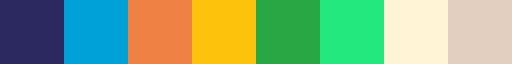

In [2]:
# setting color scheme for plots


hex_colors = ['#2B2960', '#00A1D8', '#F08144', '#FDC20C', '#29A744', '#22E87E', '#FFF4D5', '#E3CFBF']

custom_palette = sns.set_palette(sns.color_palette(hex_colors))

# pandas plot: colormap = custom_cmap_hex, plt/sns plot : cmap = custom_cmap_hex
custom_cmap_hex1 = ListedColormap(sns.color_palette(hex_colors).as_hex())

custom_cmap_hex1 

# pandas plot: colormap = custom_cmap_hex, plt/sns plot : cmap = custom_cmap_hex


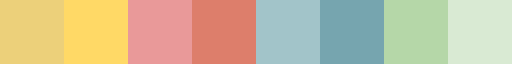

In [3]:


# euphoric = #FFF2CC, happy = #FFD966, tense = #E99999, angry = #DD7E6B, depressed = #A2C4C9, sad = #76A5AF, relaxed = #B5D7A8, calm = #D9EAD3,
hex_colors_quad = ['#ecd07a', '#FFD966', '#E99999', '#DD7E6B', '#A2C4C9', '#76A5AF', '#B5D7A8', '#D9EAD3']
custom_cmap_quad = ListedColormap(sns.color_palette(hex_colors_quad).as_hex())

custom_cmap_quad 



## Loading the data

In [4]:
# load the modelling data file for moosic with all music track samples

moosic_data_all = pd.read_csv('../data/processed/moosic_data_processed.csv', low_memory=False)

# get shape 

print(f"Music data: There are {moosic_data_all.shape[0]} observations and {moosic_data_all.shape[1]} feature variables ")
print('----------'*10)

moosic_data_all.head(2)

Music data: There are 536452 observations and 26 feature variables 
----------------------------------------------------------------------------------------------------


,artists_id,track_id,artist_name,track_name,genres,release_date,explicit,duration_ms,danceability,energy,...,liveness,valence,tempo,time_signature,followers,artist_popularity,track_popularity,main_genres,core_genres,mood_goal
0,5ESobCkc6JI4tIMxQttqeg,2wAfHM7Whz67VFbdanhZlk,Bessie Smith,Nobody Knows You When Youre Down and Out,"blues, harlem renaissance, jazz blues, traditi...",1923,0,177133,0.614,0.0423,...,0.183,0.211,89.822,4,116265,41,44,['blues'],blues,sad
1,5ESobCkc6JI4tIMxQttqeg,2AZgaYZSwUosJD71J2N2Zo,Bessie Smith,Taint Nobodys Bizness If I Do,"blues, harlem renaissance, jazz blues, traditi...",1923,0,206600,0.537,0.0443,...,0.152,0.137,80.468,4,116265,30,44,['blues'],blues,sad


In [5]:
# count of moods - all tracks

moosic_data_all.groupby('mood_goal')['mood_goal'].value_counts()



mood_goal
angry         58999
calm          11879
depressed     78034
euphoric     112413
happy        121041
relaxed       66200
sad           42645
tense         45241
Name: count, dtype: int64

In [8]:
# dataset is unbalanced from the perspective of the associated mood 
#    get the count of how the mood is distributed wrt the data
# get sample size = 15000 #20000

def get_balanced_data(processed_dataset, sample_size = 20000):

    ''' 
    get data with specified sample size based on each mood?
        
    '''

    sampled_moosic_data  = pd.DataFrame()
    grouped_data = processed_dataset.groupby('mood_goal')


    for mood_label, group in grouped_data:
        
        #print(f' getting data samples for the mood : {mood_label} \n ')

        if len(group) >= sample_size: 
            random_rows = group.sample(sample_size, random_state=42) 
        else:
            random_rows = group  

        sampled_moosic_data = pd.concat([sampled_moosic_data, random_rows])

        continue

    print(f' Finished processing, data has balanced number of samples for all categories. ')

    sampled_moosic_data = sampled_moosic_data.reset_index(drop=True) 

    mood_label_counts = sampled_moosic_data['mood_goal'].value_counts()
    print(f"The size of data mood label count {mood_label_counts} ")
    print("______"*10)

    return sampled_moosic_data






In [9]:
## display balanced moosic : mood-music data

moosic_data_samples = get_balanced_data(moosic_data_all, sample_size = 15000)
moosic_data_samples = pd.concat([moosic_data_samples.drop(['main_genres','core_genres','genres'], axis = 1),
        pd.concat([moosic_data_samples['core_genres'], pd.get_dummies(moosic_data_samples['core_genres'], drop_first=True).replace({True: 1, False: 0})], axis = 1) ], axis=1)


print(f"Music data: There are {moosic_data_samples.shape[0]} observations and {moosic_data_samples.shape[1]} feature variables ")
print('----------'*10)

moosic_data_samples.head()


 Finished processing, data has balanced number of samples for all categories. 
The size of data mood label count mood_goal
angry        15000
depressed    15000
euphoric     15000
happy        15000
relaxed      15000
sad          15000
tense        15000
calm         11879
Name: count, dtype: int64 
____________________________________________________________
Music data: There are 116879 observations and 48 feature variables 
----------------------------------------------------------------------------------------------------


,artists_id,track_id,artist_name,track_name,release_date,explicit,duration_ms,danceability,energy,key,...,metal,other,pop,punk rock,r&b,reggae,rock,rockabilly,soul,techno
0,4i50i5M5whfhk1zFEfo36O,0Cig64RGGHtMNxHp0dFNJ8,Jaki Graham,Breaking Away,1986,0,213280,0.632,0.653,3,...,0,0,0,0,0,0,0,0,0,0
1,1uNFoZAHBGtllmzznpCI3s,6jU94jVLQ7edUOyxdMlMFv,Justin Bieber,Hold On,2021-04-09,0,170813,0.658,0.634,1,...,0,0,1,0,0,0,0,0,0,0
2,5M52tdBnJaKSvOpJGz8mfZ,3boEfHCx42xJYpfQl4NUDc,Black Sabbath,The Writ,1975-07-28,0,524120,0.328,0.503,6,...,1,0,0,0,0,0,0,0,0,0
3,3f5fB1YUbkUnW7cf7I0R48,4YH7AZpdCXEAGOsSAZYPOq,Geto Boys,My Mind Playin Tricks on Me,1992-11-17,1,311787,0.888,0.625,10,...,0,0,0,0,0,0,0,0,0,0
4,2cvtzIo0OSIAkyr7LisIT6,0Vs4k3ElAqmnYlRr5XKqzA,Tat Ming Pair,天問,1990-01,0,337467,0.533,0.731,11,...,0,0,0,0,0,0,1,0,0,0


---

# Splitting the dataset for modelling : 

* train, test split : splitting the data to avoid data leakage 
* drop columns = ['artist_id', 'track_id' , 'artist_name',  'track_name', 'core_genres']




In [11]:

# all features
all_features = ['artists_id' , 'track_id', 'artist_name', 'track_name', 'genres', 'danceability','energy', 'key', 'speechiness', 'acousticness', 
                        'release_date', 'explicit', 'key', 'loudness', 'mode', 'time_signature', 'followers', 'classical', 'country', 'instrumentalness'
                        'artist_popularity',  'track_popularity', 'tempo', 'main_genres', 'core_genres', 'mood_goal', 'blues', 'classical', 'country', 
                        'disco', 'dubstep', 'edm','electronic', 'folk', 'funk', 'gospel', 'hip hop', 'house', 'indie rock', 'jazz', 'metal', 'other', 
                        'pop', 'punk rock', 'r&b', 'reggae', 'rock','rockabilly','soul', 'techno']





In [2]:

# function to split dataset for modelling 
# splitting dataset and also retain specific features to be outputted

def split_dataset(dataset, target_feature = 'mood_goal', input_features = ['track_id', 'valence','energy', 'mood_goal'],  
                        drop_features = ['track_id'], output_features = ['track_id', 'mood_goal']): 

    ## get list of moosic data features
    #features = dataset.columns.tolist()

    # defining X (input feature vectors) and Y (target output features)


    X_data = dataset[input_features]

    y_data = dataset['mood_goal']


    # splitting the dataset into train and test

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=42, shuffle=True, stratify=y_data)

    Y_train = X_train[output_features].reset_index(drop=True)
    Y_test = X_test[output_features].reset_index(drop=True)

    X_train = X_train[input_features].drop(drop_features, axis=1).reset_index(drop=True)
    X_test =  X_test[input_features].drop(drop_features, axis=1).reset_index(drop=True)

    y_train = Y_train[target_feature].reset_index(drop=True)
    y_test = Y_test[target_feature].reset_index(drop=True)

    data  = {
        'X_data':X_data,
        'y_data':y_data,
        'X_train':X_train,
        'X_test':X_test,
        'y_train':y_train,
        'y_test':y_test,        
        'Y_train':Y_train,
        'Y_test':Y_test,
        }

    return data




NameError: name 'mood_categories' is not defined

In [ ]:

#sample_size = 20000

mood_categories = ['angry', 'calm', 'depressed', 'euphoric', 'happy', 'relaxed', 'sad', 'tense']

# baseline_features = moosic_data.columns.tolist()

# all features
all_features = ['artists_id' , 'track_id', 'artist_name', 'track_name', 'genres', 'danceability','energy', 'key', 'speechiness', 'acousticness', 
                        'release_date', 'explicit', 'key', 'loudness', 'mode', 'time_signature', 'followers', 'classical', 'country', 'instrumentalness'
                        'artist_popularity',  'track_popularity', 'tempo', 'main_genres', 'core_genres', 'mood_goal', 'blues', 'classical', 'country', 
                        'disco', 'dubstep', 'edm','electronic', 'folk', 'funk', 'gospel', 'hip hop', 'house', 'indie rock', 'jazz', 'metal', 'other', 
                        'pop', 'punk rock', 'r&b', 'reggae', 'rock','rockabilly','soul', 'techno']


#features to be dropped
drop_features = ['track_id', 'track_name', 'artist_name',  'core_genres', 'mood_goal', 'release_date']


# feature columns
baseline_input_features = ['track_id', 'track_name', 'artist_name',  'core_genres', 'mood_goal','danceability', 'valence', 'tempo','energy', 
                        'release_date', 'key', 'speechiness', 'acousticness', 'instrumentalness',  'loudness', 'mode', 'time_signature',
                        'blues', 'classical', 'country', 'disco', 'dubstep', 'edm','electronic', 'folk', 'funk', 'gospel', 'hip hop', 'house', 'indie rock', 
                        'jazz', 'metal', 'other', 'pop', 'punk rock', 'r&b', 'reggae', 'rock','rockabilly','soul', 'techno']


# features to be outputed by the recommender at the end
output_features = ['track_id', 'track_name', 'artist_name',  'core_genres', 'mood_goal']


# target column
target_feature = 'mood_goal'



In [1]:
# get data splits
# n=15

#moosic_data_nk = split_dataset(moosic_data_samples, mood_categories = mood_categories, target_feature = target_feature,
#                        input_features = baseline_input_features,  output_features = output_features)


moosic_data_nk = split_dataset(moosic_data_samples, mood_categories = mood_categories, target_feature = target_feature,
                        input_features = baseline_input_features,  output_features = output_features)




NameError: name 'split_dataset' is not defined

In [ ]:
# X features (input):  X_train, X_test
# Y features (output):  Y_train, Y_test
# y feature (target):  y_train, y_test


print("X train (input features) ")
print("-----"*10)
X_train = moosic_data_nk['X_train']
display(X_train.head(2))

print("X test (input features) ")
print("-----"*10)
X_test = moosic_data_nk['X_test']
display(X_test.head(2))


print("Y train (target output features) ")
print("-----"*10)
Y_train = moosic_data_nk['Y_train']
display(Y_train.head(2))


print("Y test (target output features) ")
print("-----"*10)
Y_test = moosic_data_nk['Y_test']
display(Y_test.head(2))


print("y train (target feature) ")
print("-----"*10)
y_train = moosic_data_nk['y_train']
display(y_train.head(2))


print("y test (target feature) ")
print("-----"*10)
y_test = moosic_data_nk['y_test']
display(y_test.head(2))


X train (input features) 
--------------------------------------------------


,danceability,valence,tempo,energy,key,speechiness,acousticness,instrumentalness,loudness,mode,...,metal,other,pop,punk rock,r&b,reggae,rock,rockabilly,soul,techno
0,0.537,0.438,77.265,0.447,10,0.0354,0.6810,0.000,-10.347,1,...,0,0,1,0,0,0,0,0,0,0
1,0.493,0.313,81.940,0.720,6,0.0269,0.0175,0.176,-5.400,1,...,0,0,0,0,0,0,1,0,0,0


X test (input features) 
--------------------------------------------------


,danceability,valence,tempo,energy,key,speechiness,acousticness,instrumentalness,loudness,mode,...,metal,other,pop,punk rock,r&b,reggae,rock,rockabilly,soul,techno
0,0.748,0.684,147.332,0.273,7,0.0385,0.65900,0.001380,-17.225,1,...,0,0,1,0,0,0,0,0,0,0
1,0.383,0.134,132.389,0.857,9,0.0738,0.00825,0.000572,-8.059,0,...,1,0,0,0,0,0,0,0,0,0


Y train (target output features) 
--------------------------------------------------


,track_id,track_name,artist_name,core_genres,mood_goal
0,3IQ5Q7QVh8slmnH8QKL0W5,Tomame o Dejame,Maria Conchita Alonso,pop,depressed
1,1jpAWi5bencl8ALdWFHC8X,Волки,Bi-2,rock,angry


Y test (target output features) 
--------------------------------------------------


,track_id,track_name,artist_name,core_genres,mood_goal
0,1B3F2hxwLG3lgvlpuome7S,Prefiero Ir Sola,Marisela,pop,relaxed
1,33RHUz9f6arQ0xF5fqNYfx,ざわめく時へと,EARTHSHAKER,metal,tense


y train (target feature) 
--------------------------------------------------


0    depressed
1        angry
Name: mood_goal, dtype: object

y test (target feature) 
--------------------------------------------------


0    relaxed
1      tense
Name: mood_goal, dtype: object

---
# Modelling

* elbow method
* dimensionality reduction / visualization of clusters in lower (2d) dimension
* clustering
* (?!)visualization of clusters in lower (2d) dimension
* prediction/classification (multi-class classification) models ... multi-label?
* recommender :top n = 5 based on item-item similarity computation based on clustering


---

In [79]:

def optimal_cluster_plot(data, tsne=True):

    wcss_inertias = []

    if tsne == True:
        tsne = TSNE(n_components=2)
        data = tsne.fit_transform(data)

    else:
        data = data

    for k in range(4, 20):
        model = MiniBatchKMeans(n_clusters=k)
        model.fit(data)
        wcss_inertias.append(model.inertia_)
        
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(range(4, 20), wcss_inertias, '-o')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS : Within clusters sum of squares')
    plt.title('Elbow method to determine optimal K number of clusters')
    plt.xticks(range(4, 20))
    plt.show(); 








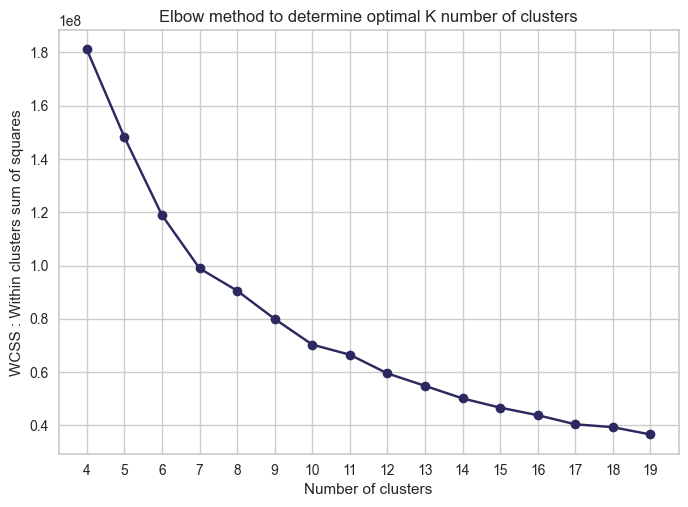

In [80]:

# optimal number of clusters using elbow method analysis to compare with the researched  basic number of moods for music (8)

optimal_cluster_plot(X_train, tsne=True)



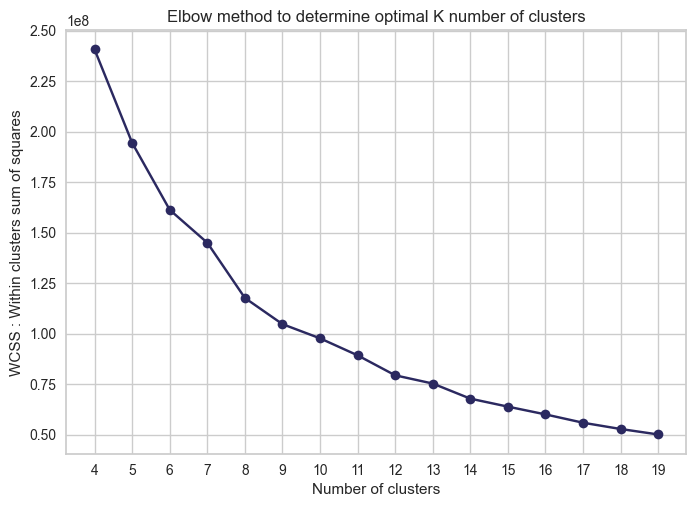

In [81]:
data = X_train[['valence',  'energy']]
optimal_cluster_plot(data, tsne=True)

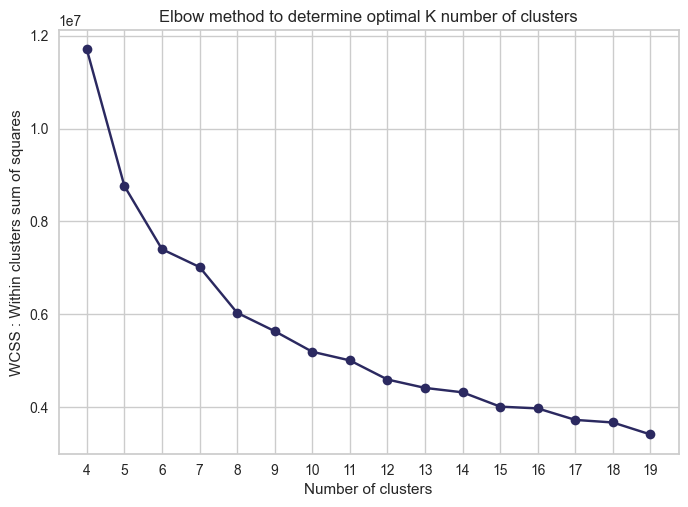

In [82]:
# without tsne

optimal_cluster_plot(X_train, tsne=False)

In [84]:

# function clustering model (+ tsne) 


def clustering_model(data,  pca = True, tsne=True, params = {'n_clusters': 8}, sample_size=5000, *args, **kwargs):


    data = data.head(sample_size)
    scaled_data = MinMaxScaler().fit_transform(data)
    data_col = data.columns.to_list()
    data = pd.DataFrame(scaled_data, columns = data_col)

    if pca == True:
        pca = PCA(n_components=2, random_state = 42)

        pca_start_time = time.time()

        data = MinMaxScaler().fit_transform(pca.fit_transform(data))

        pca_end_time = time.time()
        pca_train_time = pca_end_time - pca_start_time
        print(f"Time taken for dimensionality reduction using PCA: {pca_train_time:.2f} seconds")

        data = pd.DataFrame(data, columns = ['dimension_0', 'dimension_1'])

    else:
        data = data


    model = MiniBatchKMeans(**params)

    kme_start_time = time.time()

    data['cluster_labels'] = model.fit_predict(data)

    kme_end_time = time.time()
    kme_train_time = kme_end_time - kme_start_time
    

    cluster_labels = model.labels_ 
    cluster_centers = model.cluster_centers_ 

    #if tsne == True:
    tsne = TSNE(n_components=2, random_state = 42)

    tsne_start_time = time.time()

    tsne_embeddings = tsne.fit_transform(data)

    tsne_end_time = time.time()
    tsne_train_time = tsne_end_time - tsne_start_time
        

    #else:
    #    data = data


    
    # kp_model_name = "minikmeans.pickle"
    # tp_model_name = "tsne_embed.pickle"

    # pickle.dump(model, open(kp_model_name, 'wb'))
    # pickle.dump(model, open(tp_model_name, 'wb'))


    # kj_model_name = "minikmeans.joblib"
    # tj_model_name = "tsne_embed.joblib"

    # joblib.dump(model, kj_model_name)
    # joblib.dump(model, tj_model_name)



    return data, tsne_embeddings, cluster_labels, cluster_centers






In [188]:
X_train.shape

(93503, 35)

In [190]:


# defining the actual y (target data - mood_goal)
# y : y_train, y_test


# encode categorical data : mood
y_train_dummies = pd.get_dummies(y_train, drop_first=True).replace({True: 1, False: 0})
encoded_y_train = pd.concat([y_train, y_train_dummies], axis=1)

y_test_dummies = pd.get_dummies(y_test, drop_first=True).replace({True: 1, False: 0})
encoded_y_test = pd.concat([y_test, y_test_dummies], axis=1)


print("encoded target (train) data - mood_goal ")
print("-----"*10)
display(encoded_y_train.head(2))


print("encoded target (test) data - mood_goal ")
print("-----"*10)
display(encoded_y_test.head(2))


#mood_labels = ["depressed", "sad", "anxious",  "neutral", "calm", "euphoric", "energetic", "happy"]
#mood_1d_class = [0, 1, 2, 3, 4, 5, 6, 7]


# add targets for evaluation for clusters later

#moosic_data["mood_label"] = (pd.cut(moosic_data["valence"], bins=mood_valence_values, labels=mood_1d_labels)).astype('string')
#moosic_data["mood_class"] = (pd.cut(moosic_data["valence"], bins=mood_valence_values, labels=mood_1d_class)).astype('Int64')

#moosic_data.head(2)


encoded target (train) data - mood_goal 
--------------------------------------------------


,mood_goal,calm,depressed,euphoric,happy,relaxed,sad,tense
0,depressed,0,1,0,0,0,0,0
1,angry,0,0,0,0,0,0,0


encoded target (test) data - mood_goal 
--------------------------------------------------


,mood_goal,calm,depressed,euphoric,happy,relaxed,sad,tense
0,relaxed,0,0,0,0,1,0,0
1,tense,0,0,0,0,0,0,1


In [191]:
# checking clustered data features

clustered_data, clustered_embeddings, cluster_labels, cluster_centers = clustering_model(X_train,  pca = False, tsne = True, 
                                                                        params = {'n_clusters': 8}, sample_size = 5000)

clustered_data.head(2)

,danceability,valence,tempo,energy,key,speechiness,acousticness,instrumentalness,loudness,mode,...,other,pop,punk rock,r&b,reggae,rock,rockabilly,soul,techno,cluster_labels
0,0.551335,0.445575,0.331591,0.447447,0.909091,0.036875,0.683735,0.000000,0.827233,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.506160,0.318413,0.351654,0.720721,0.545455,0.028021,0.017570,0.177241,0.909651,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2


In [148]:
# baseline: recommendation based on predictions of music track (mood-genre groups) and recommendation
# - mood labels are labeled encoded (but may introduce ordering bias)
## * --> np.unique(y_train['mood_2d_label'].copy()) = ['angry' 'calm' 'depressed' 'euphoric' 'happy' 'relaxed' 'sad' 'tense']
## * --> np.unique(LabelEncoder().fit_transform(y_train[['mood_2d_label']]).copy()) = array([0, 1, 2, 3, 4, 5, 6, 7])
## * --> np.concatenate([b, c]).tolist() =  ['angry','calm','depressed','euphoric','happy','relaxed','sad','tense',0,1,2,3,4,5,6,7]
#mood_list_types = ['angry','calm','depressed','euphoric','happy','relaxed','sad','tense', 0, 1, 2, 3, 4, 5, 6, 7]


baseline_cluster_params = {
    'n_clusters' : 8,
    'batch_size' : 500,
    'random_state' : 42,
    'init' : 'k-means++' #random
}


mood_clusters  = {
                        'happy' : 4,
                        'euphoric' : 3,                  
                        'tense' : 7, 
                        'angry' :0, 
                        'depressed' : 2, 
                        'sad' :6, 
                        'calm' : 1, 
                        'relaxed' : 5

    }


def baseline_clustering(x_train,  mood_clusters = mood_clusters, cluster_params = baseline_cluster_params,
                        pca=False, tsne=True, sample_size = 10000,  *args, **kwargs):


    # clustering with mini-batch kmeans 
    clustered_data, clustered_embeddings, cluster_labels, cluster_centers = clustering_model(x_train,  pca = pca, tsne = tsne, 
                                                                        params = cluster_params)

    #feature matrix of one-hot encoded cluster representation
    feature_matrix = np.eye(cluster_params['n_clusters'])[cluster_labels]

    #track_similarity_matrix = 1 - pairwise_distances(clustered_data, cluster_centers, metric='cosine')



    #print("________"*20)
    #print("________"*20)

    # visualize the clustered data
    fig, ax = plt.subplots(figsize = (16, 10))
    # fig, ax = plt.subplots()
    # fig, ax = plt.figure()

    scaled_embed = MinMaxScaler().fit_transform(clustered_embeddings)
    plt.scatter(scaled_embed[:, 0], scaled_embed[:, 1], c=cluster_labels, cmap=custom_cmap_quad)
    #plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='black') 

    # for cluster_centerx, cluster_centery in zip(cluster_centers[:, 0], cluster_centers[:, 1]):

    #    plt.scatter(cluster_centerx, cluster_centery, marker='X', color='black') 


    plt.legend()
    plt.title('Music - Mood Clustered Data ', pad=15, fontsize = 20, weight = 'bold', color='#928d8d')#'#C3C7C5')
    plt.colorbar()

    get_axes = plt.gca()
    plt.xticks([]) 
    plt.yticks([]) 
    xax = get_axes.axes.get_xaxis()
    
    xax = xax.set_visible(False)

    yax = get_axes.axes.get_yaxis()
    yax = yax.set_visible(False)

    # Set the axis colors
    ax.set_facecolor('#F7F3F0') #E2E2DB
    ax.grid(color='#cfcecb')
    ax.set_facecolor('#eeeeee') #eeeeee
    ax.spines['bottom'].set_color('#eeeeee')
    ax.spines['top'].set_color('#eeeeee')
    ax.spines['right'].set_color('#eeeeee')
    ax.spines['left'].set_color('#eeeeee')
    ax.xaxis.label.set_color('#eeeeee')
    ax.yaxis.label.set_color('#eeeeee')

    plt.show()
    plt.savefig('../images/1_clusters_count_plot.png', transparent=True)

    return clustered_data, clustered_embeddings, scaled_embed




In [157]:
np.unique(Y_train['mood_goal'].copy())


array(['angry', 'calm', 'depressed', 'euphoric', 'happy', 'relaxed',
       'sad', 'tense'], dtype=object)

In [168]:
# mood_clusters  = {
#                         'happy' : 4,
#                         'euphoric' : 3,                  
#                         'tense' : 7, 
#                         'angry' :0, 
#                         'depressed' : 2, 
#                         'sad' :6, 
#                         'calm' : 1, 
#                         'relaxed' : 5

#     }


mood_clusters  = {
                'relaxed' : 0,
                'happy' : 1,
                'euphoric' : 2,
                'depressed' : 3, 
                'sad' :4,  
                'calm' : 5,                                          
                'tense' : 6, 
                'angry' :7
    }

#mood_list_types = list(mood_clusters.items())
mood_list_types = [item for sublist in mood_clusters.items() for item in sublist]

mood_list_types

['relaxed',
 0,
 'happy',
 1,
 'euphoric',
 2,
 'depressed',
 3,
 'sad',
 4,
 'calm',
 5,
 'tense',
 6,
 'angry',
 7]

In [ ]:
# mood_labels = ["relaxed", "happy", "euphoric", "depressed", "sad",  "calm", "tense",  "angry", ]
# mood_cat_values = [0, 1, 2, 3, 4, 5, 6, 7]


# # add targets for evaluation for clusters later

# moosic_data["mood_label"] = (pd.cut(moosic_data["mood_labels"], bins=mood_valence_values, labels=mood_1d_labels)).astype('string')
# moosic_data["mood_class"] = (pd.cut(moosic_data["valence"], bins=mood_valence_values, labels=mood_1d_class)).astype('Int64')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


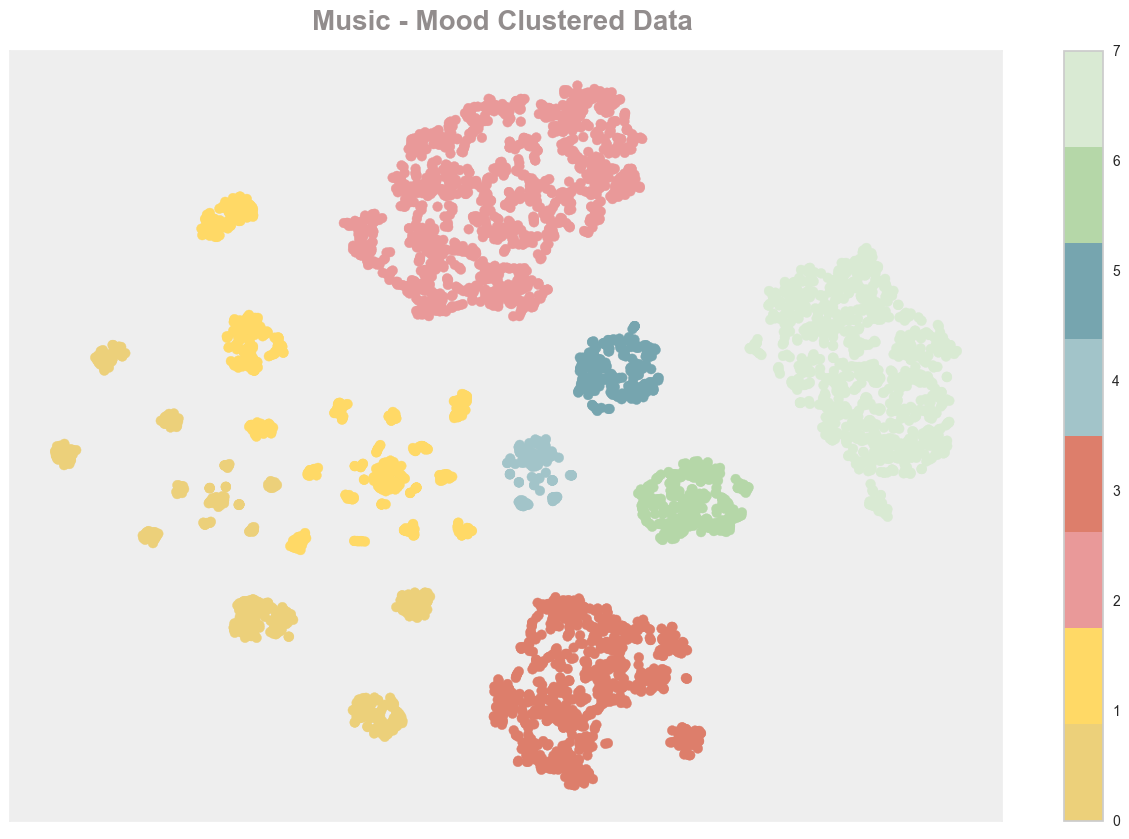

<Figure size 800x550 with 0 Axes>

In [170]:
# run baseline
# - run clustering model : kmeans/ mini-batch kmeans
# - dimensionality reduction and visualization with tsne
# - query clustered data and output N = 5 recommendations
# - final data shows music track name and its associated, artist, mood goal/group, core genre, and its K clustered labels.

# mood_clusters  = {
#                         'happy' : [(0.5, 1.0), (0.5, 0.75)],
#                         'euphoric' : [(0.5, 1.0), (0.75, 1.0)],                  
#                         'tense' : [(0.0, 0.5), (0.75, 1.0)], 
#                         'angry' :[(0.0, 0.5), (0.5, 0.75)], 
#                         'depressed' : [(0.0, 0.5), (0.25, 0.5)], 
#                         'sad' :[(0.0, 0.5), (0.0, 0.25)], 
#                         'calm' : [(0.5, 1.0), (0.0, 0.25)], 
#                         'relaxed' : [(0.5, 1.0), (0.25, 0.5)]

#     }


mood_clusters  = {
                        'happy' : 4,
                        'euphoric' : 3,                  
                        'tense' : 7, 
                        'angry' :0, 
                        'depressed' : 2, 
                        'sad' :6, 
                        'calm' : 1, 
                        'relaxed' : 5

    }


clustered_data, clustered_embeddings, scaled_embeddings = baseline_clustering(X_train,  mood_clusters = mood_clusters, cluster_params = baseline_cluster_params,
                        pca=False, tsne=True, sample_size = 15000)




In [230]:

# recommend top N = 5 or random N = 5 music track based on user preferences
def baseline_recommender(clustered_data, y_train, clustered_embeddings, scaled_embed, user_preferences = {'mood_goal': 'relaxed', 'preferred_genre': 'hip hop'}, 
                        playlist_length= 5, mood_clusters = mood_clusters, *args, **kwargs):


    recommender_start_time = time.time()

    # recommender: query data based on user's preferences and clustered data


    y_train_classes = np.unique(y_train['mood_goal'].copy())
    y_train_classes_encoded = LabelEncoder().fit_transform(y_train[['mood_goal']]).copy()
    mood_list_types = np.concatenate([y_train_classes, np.unique(y_train_classes_encoded)]).tolist()
    y_train['mood_label'] = y_train_classes_encoded

    #y_train['mood_label'] = y_train.replace({'relaxed' : 0, 'happy' : 1,'euphoric' : 2, 'depressed' : 3, 
    #           'sad' :4,  'calm' : 5,  'tense' : 6, 'angry' :7})

    #mood_list_types = [item for sublist in mood_clusters.items() for item in sublist]

    final_data = pd.concat([ y_train[['track_id', 'track_name', 'artist_name', 'mood_goal', 'core_genres', 'mood_label' ]], clustered_data['cluster_labels']], axis=1)

    if (user_preferences['mood_goal'] in mood_list_types): #and (user_preferences['preferred_genre'] in mood_list_types):    
        choice = mood_clusters[user_preferences['mood_goal']]
        query_data = final_data.query("cluster_labels == @choice") 

    else:
        raise ValueError("Input mood goal is unavailable .... specified only! ")

    #print("________"*20)
    #print("________"*20)


    print(f"Recommended music tracks based on {user_preferences['mood_goal']}: \n ")
    print("________"*15)

    #print(f" Enjoy these {playlist_length} music tracks from spotify")
    #print("             "*10)

    #recommended_moosic_playlist = query_data.sample(n=playlist_length, random_state = 42, replace=False)

    #print("________"*10)
    moosic_randomN_idx = np.random.choice(
                            query_data.index,
                            size = 5, #playlist_length,
                            replace= False #random n = 5
                            )
    
    recommended_moosic_playlist = final_data.iloc[moosic_randomN_idx]


    recommender_end_time = time.time()
    recommender_train_time = recommender_end_time - recommender_start_time
    print(f"Time taken for the recommender model : {recommender_train_time:.2f} seconds")

    #print("________"*20)
    #print("________"*20)

    return final_data, recommended_moosic_playlist






In [231]:


# baseline recommender
final_data, n_mood_music = baseline_recommender(clustered_data, Y_train, clustered_embeddings, scaled_embeddings, user_preferences = {'mood_goal': 'relaxed', 'preferred_genre': 'pop'}, 
                        playlist_length= 5, mood_clusters = mood_clusters)


# display recommendations
n_mood_music

Recommended music tracks based on relaxed: 
 
________________________________________________________________________________________________________________________
Time taken for the recommender model : 0.10 seconds


,track_id,track_name,artist_name,mood_goal,core_genres,mood_label,cluster_labels
7820,4A5aaAztajIUemRHOsbqse,Wabash Cannon Ball,Roy Acuff,calm,folk,1,5.0
9462,0BlqZi9ZM7mIiZOcWS1Yws,Rio de lágrimas (Rio de Piracicaba),Almir Sater,happy,folk,4,5.0
3733,3yxFlM1AtLufMFL7f0yJJI,Sev Dedi Gözlerim,Orhan Gencebay,depressed,folk,2,5.0
6299,7zZS4CKz848H1f3LwDzcPR,Magic Mirror,Leon Russell,calm,folk,1,5.0
6702,2Zz8IUCChTScCYntSEB0mN,Kolly Haga,Abdel Halim Hafez,sad,folk,6,5.0


In [152]:
final_data.groupby('mood_goal')[['mood_goal']].value_counts()

mood_goal
angry        12000
calm          9503
depressed    12000
euphoric     12000
happy        12000
relaxed      12000
sad          12000
tense        12000
Name: count, dtype: int64

In [158]:

#groups = final_data.groupby('cluster_labels')[['mood_label', 'cluster_labels']].value_counts()

#groups.to_dict()

##


* tracks count grouped by cluster labels

``````
{0.0: 603,
 1.0: 679,
 2.0: 1278,
 3.0: 792,
 4.0: 146,
 5.0: 244,
 6.0: 293,
 7.0: 965}
``````



In [179]:
# evaluation metrics : clustering


def cluster_evaluation_metrics(ground_truth, predictions, silhouette=True):
    
    if silhouette == False:
        clustering_metrics = [
                # (n_samples, )
                metrics.rand_score,
                metrics.fowlkes_mallows_score,
                metrics.homogeneity_score,
                metrics.completeness_score,
                metrics.v_measure_score,
                metrics.mutual_info_score,
                metrics.adjusted_rand_score,
                metrics.adjusted_mutual_info_score
            ]

        for metric in clustering_metrics:
            score_class = metric(ground_truth.to_numpy(), predictions.to_numpy())



    else:
        cluster_scores_metrics = [
                # (n_samples, 1)
                metrics.silhouette_score,
                metrics.calinski_harabasz_score,
            ]


        for metric in cluster_scores_metrics:
            score_class = metric(ground_truth.to_numpy().reshape(-1,1), predictions.to_numpy().reshape(-1,1))







In [180]:
# display final dataset for all clustered samples

final_data.head(2)


,track_id,track_name,artist_name,mood_goal,core_genres,mood_label,cluster_labels
0,3IQ5Q7QVh8slmnH8QKL0W5,Tomame o Dejame,Maria Conchita Alonso,depressed,pop,2,3.0
1,1jpAWi5bencl8ALdWFHC8X,Волки,Bi-2,angry,rock,0,2.0


In [183]:
# drop null/empty rows

null_rows11 = final_data[final_data.isnull().T.any()].index
final_data = final_data.drop(null_rows11)
empty_values = final_data.isna().sum()
print(empty_values)

track_id          0
track_name        0
artist_name       0
mood_goal         0
core_genres       0
mood_label        0
cluster_labels    0
dtype: int64


In [184]:
final_data.head(2)

,track_id,track_name,artist_name,mood_goal,core_genres,mood_label,cluster_labels
0,3IQ5Q7QVh8slmnH8QKL0W5,Tomame o Dejame,Maria Conchita Alonso,depressed,pop,2,3.0
1,1jpAWi5bencl8ALdWFHC8X,Волки,Bi-2,angry,rock,0,2.0


In [204]:
# evaluation metrics


print(metrics.rand_score(final_data['mood_label'], final_data['cluster_labels']))

print(metrics.cluster.adjusted_rand_score(final_data['mood_label'], final_data['cluster_labels']))

print(metrics.homogeneity_score(final_data['mood_label'], final_data['cluster_labels']))


print(metrics.completeness_score(final_data['mood_label'], final_data['cluster_labels']))


print(metrics.v_measure_score(final_data['mood_label'], final_data['cluster_labels']))

print(metrics.silhouette_score(final_data['mood_label'].to_numpy().reshape(-1,1), final_data['cluster_labels'].to_numpy().reshape(-1,1)))

print(metrics.mutual_info_score(final_data['mood_label'], final_data['cluster_labels']))


0.7648839367873574
0.06350028695450326
0.13156250991017432
0.1435436646993093
0.13729219154279648
-0.09487641973492567
0.27288930276754264



# Main model 



In [193]:
main_input_features = ['track_id', 'track_name', 'artist_name',  'core_genres', 'mood_goal','danceability', 'release_date',
                    'valence', 'energy',  'tempo', 'acousticness', 'instrumentalness', #'key', 'loudness',
                    'blues', 'classical', 'country', 'disco', 'dubstep', 'edm','electronic', 
                    'folk', 'funk', 'gospel', 'hip hop', 'house', 'indie rock', 'jazz', 'metal', 
                    'other', 'pop', 'punk rock', 'r&b', 'reggae', 'rock','rockabilly','soul', 'techno']

# fetures to be outputed by the recommender at the end
output_features = ['track_id', 'track_name', 'artist_name',  'core_genres', 'mood_goal']

# target column
target_feature = 'mood_goal'



In [194]:
# get data splits


main_moosic_data_nk = split_dataset(moosic_data_samples, mood_categories = mood_categories, target_feature = target_feature,
                        input_features = main_input_features,  output_features = output_features)




In [197]:
# X features (input):  X_train, X_test
# Y features (output):  Y_train, Y_test
# y feature (target):  y_train, y_test


print("X train (input features) ")
print("-----"*10)
Xm_train = main_moosic_data_nk['X_train']
display(Xm_train.head(2))

print("X test (input features) ")
print("-----"*10)
Xm_test = main_moosic_data_nk['X_test']
display(Xm_test.head(2))


print("Y train (target output features) ")
print("-----"*10)
Ym_train = main_moosic_data_nk['Y_train']
display(Ym_train.head(2))


print("Y test (target output features) ")
print("-----"*10)
Ym_test = main_moosic_data_nk['Y_test']
display(Ym_test.head(2))


print("y train (target feature) ")
print("-----"*10)
ym_train = main_moosic_data_nk['y_train']
display(ym_train.head(2))


print("y test (target feature) ")
print("-----"*10)
ym_test = main_moosic_data_nk['y_test']
display(ym_test.head(2))


X train (input features) 
--------------------------------------------------


,danceability,valence,energy,tempo,acousticness,instrumentalness,blues,classical,country,disco,...,metal,other,pop,punk rock,r&b,reggae,rock,rockabilly,soul,techno
0,0.537,0.438,0.447,77.265,0.6810,0.000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.493,0.313,0.720,81.940,0.0175,0.176,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


X test (input features) 
--------------------------------------------------


,danceability,valence,energy,tempo,acousticness,instrumentalness,blues,classical,country,disco,...,metal,other,pop,punk rock,r&b,reggae,rock,rockabilly,soul,techno
0,0.748,0.684,0.273,147.332,0.65900,0.001380,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.383,0.134,0.857,132.389,0.00825,0.000572,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Y train (target output features) 
--------------------------------------------------


,track_id,track_name,artist_name,core_genres,mood_goal
0,3IQ5Q7QVh8slmnH8QKL0W5,Tomame o Dejame,Maria Conchita Alonso,pop,depressed
1,1jpAWi5bencl8ALdWFHC8X,Волки,Bi-2,rock,angry


Y test (target output features) 
--------------------------------------------------


,track_id,track_name,artist_name,core_genres,mood_goal
0,1B3F2hxwLG3lgvlpuome7S,Prefiero Ir Sola,Marisela,pop,relaxed
1,33RHUz9f6arQ0xF5fqNYfx,ざわめく時へと,EARTHSHAKER,metal,tense


y train (target feature) 
--------------------------------------------------


0    depressed
1        angry
Name: mood_goal, dtype: object

y test (target feature) 
--------------------------------------------------


0    relaxed
1      tense
Name: mood_goal, dtype: object

In [198]:
Xm_train.shape

(93503, 30)

In [199]:


# defining the actual y (target data - mood_goal)
# y : y_train, y_test


# encode categorical data : mood
ym_train_dummies = pd.get_dummies(y_train, drop_first=True).replace({True: 1, False: 0})
encoded_ym_train = pd.concat([ym_train, ym_train_dummies], axis=1)

ym_test_dummies = pd.get_dummies(y_test, drop_first=True).replace({True: 1, False: 0})
encoded_ym_test = pd.concat([ym_test, ym_test_dummies], axis=1)


print("encoded target (train) data - mood_goal ")
print("-----"*10)
display(encoded_ym_train.head(2))


print("encoded target (test) data - mood_goal ")
print("-----"*10)
display(encoded_ym_test.head(2))


# mood_labels = ["depressed", "sad", "anxious",  "neutral", "calm", "euphoric", "energetic", "happy"]
# mood_1d_class = [0, 1, 2, 3, 4, 5, 6, 7]


# # add targets for evaluation for clusters later

# moosic_data["mood_label"] = (pd.cut(moosic_data["valence"], bins=mood_valence_values, labels=mood_1d_labels)).astype('string')
# moosic_data["mood_class"] = (pd.cut(moosic_data["valence"], bins=mood_valence_values, labels=mood_1d_class)).astype('Int64')

# moosic_data.head(2)


encoded target (train) data - mood_goal 
--------------------------------------------------


,mood_goal,calm,depressed,euphoric,happy,relaxed,sad,tense
0,depressed,0,1,0,0,0,0,0
1,angry,0,0,0,0,0,0,0


encoded target (test) data - mood_goal 
--------------------------------------------------


,mood_goal,calm,depressed,euphoric,happy,relaxed,sad,tense
0,relaxed,0,0,0,0,1,0,0
1,tense,0,0,0,0,0,0,1


In [211]:
#Xm_train.columns.to_list()

In [200]:
# global variables


modelling_data = {
    
    'X_train' : Xm_train,
    'X_test' : Xm_test,
    'Y_train' : Ym_train,
    'Y_test' : Ym_test,
    'y_train' : ym_train,
    'y_test' : ym_test,
    'encoded_y_train' : encoded_ym_train,
    'encoded_y_test' : encoded_ym_test

    }


main_cluster_params = {
        'n_clusters' : 8,
        'batch_size' : 500,
        'random_state' : 42,
        'init' : 'k-means++' 
    }

# clf_params = {
#         'n_estimators': [50, 100, 200],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'max_depth': [None, 3, 8, 11, 20]
#     }

user_preferences = {'mood goal': 'relaxed', 'preferred_genre': 'hip hop'}

In [208]:


mood_clusters  = {
                        'happy' : 4,
                        'euphoric' : 3,                  
                        'tense' : 7, 
                        'angry' :0, 
                        'depressed' : 2, 
                        'sad' :6, 
                        'calm' : 1, 
                        'relaxed' : 5

    }


def moosic_clustering(Xm_train, playlist_length= 5, cluster_params = main_cluster_params, mood_clusters = mood_clusters,
                        pca=False, tsne=True, sample_size = 10000, *args, **kwargs):


    # model : clustering with mini-batch kmeans 
    clustered_data, clustered_embeddings, cluster_labels, cluster_centers = clustering_model(Xm_train,  pca = False, tsne = True, 
                                                                            params = main_cluster_params, sample_size = sample_size)


    #scaled_embed = MinMaxScaler().fit_transform(clustered_embeddings)

    # visualize the clustered data
    fig, ax = plt.subplots(figsize = (16, 10))
    

    scaled_embed = MinMaxScaler().fit_transform(clustered_embeddings)
    plt.scatter(scaled_embed[:, 0], scaled_embed[:, 1], c=cluster_labels, cmap=custom_cmap_quad)
    #plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='black') 

    # for cluster_centerx, cluster_centery in zip(cluster_centers[:, 0], cluster_centers[:, 1]):

    #    plt.scatter(cluster_centerx, cluster_centery, marker='X', color='black') 


    plt.legend()
    plt.title('Music - Mood Clustered Data ', pad=15, fontsize = 20, weight = 'bold', color='#928d8d')#'#C3C7C5')
    plt.colorbar()

    get_axes = plt.gca()
    plt.xticks([]) 
    plt.yticks([]) 
    xax = get_axes.axes.get_xaxis()
    
    xax = xax.set_visible(False)

    yax = get_axes.axes.get_yaxis()
    yax = yax.set_visible(False)

    # Set the axis colors
    ax.set_facecolor('#F7F3F0') #E2E2DB
    ax.grid(color='#cfcecb')
    ax.set_facecolor('#eeeeee') #eeeeee
    ax.spines['bottom'].set_color('#eeeeee')
    ax.spines['top'].set_color('#eeeeee')
    ax.spines['right'].set_color('#eeeeee')
    ax.spines['left'].set_color('#eeeeee')
    ax.xaxis.label.set_color('#eeeeee')
    ax.yaxis.label.set_color('#eeeeee')

    plt.show()
    plt.savefig('../images/3_clusters_main.png', transparent=True)


    return clustered_data, clustered_embeddings, scaled_embed




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


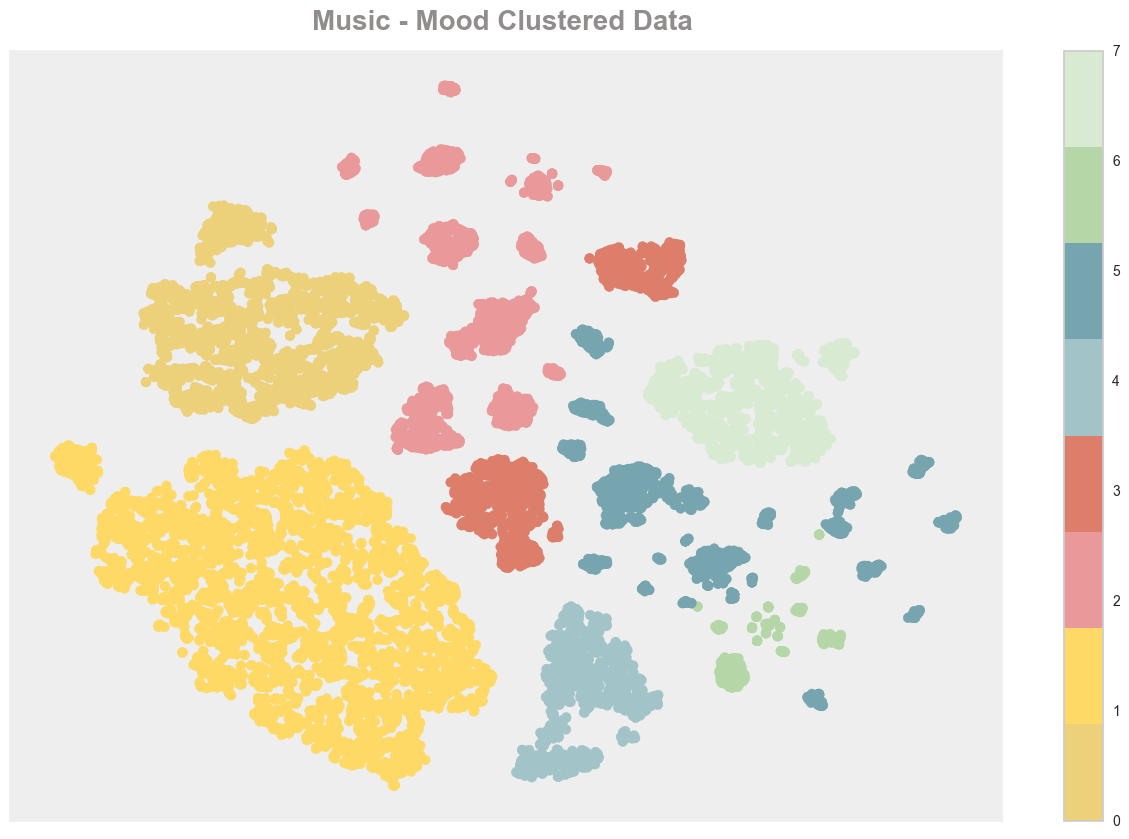

<Figure size 800x550 with 0 Axes>

In [223]:
###

main_clustered_data, main_clustered_embeddings, main_scaled_embeddings = moosic_clustering(Xm_train, playlist_length= 5, cluster_params = main_cluster_params, 
                                                                            mood_clusters = mood_clusters, pca=False, tsne=True, sample_size = 15000)




In [212]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))


In [214]:
m_cluster_data = pd.concat([ Y_train, clustered_data['cluster_labels']], axis=1)



In [215]:

m_cluster_data['mood_genre'] = m_cluster_data['mood_goal'] + ' ' + m_cluster_data['core_genres']



In [216]:
m_cluster_data

,track_id,track_name,artist_name,core_genres,mood_goal,cluster_labels,mood_genre
0,3IQ5Q7QVh8slmnH8QKL0W5,Tomame o Dejame,Maria Conchita Alonso,pop,depressed,2.0,depressed pop
1,1jpAWi5bencl8ALdWFHC8X,Волки,Bi-2,rock,angry,1.0,angry rock
2,4rcKkyrC9ODuAPwdB468Uj,Switchstance,Quarashi,rock,tense,1.0,tense rock
3,6WZZe90axkD87qnEVcBSgY,God Save The Queen,Tat Ming Pair,rock,sad,1.0,sad rock
4,5VU6nvX3BqkqBmOJ2d9vhW,I Write The Songs,Barry Manilow,rock,depressed,1.0,depressed rock
...,...,...,...,...,...,...,...
93498,2lA0EwA8lrRbM4eV31m5m9,What is a youth ROMEO JULIET,Wakin Chau,pop,sad,NaN,sad pop
93499,0SCpIM9wmgJr0ccnSKZj5q,КГБ-рок,Grazhdanskaya Oborona,rock,relaxed,NaN,relaxed rock
93500,4DYvg3njBv5zoRarf9E3WB,Leyenda,Silvio Rodríguez,rock,calm,NaN,calm rock
93501,6SZSmBLqY1yXv2mBiKbFIT,"Looky, Looky, Yonder / Black Betty / Yellow Wo...",Lead Belly,blues,sad,NaN,sad blues


In [217]:
# drop null/empty rows

null_rows111 = m_cluster_data[m_cluster_data.isnull().T.any()].index
m_cluster_data = m_cluster_data.drop(null_rows111)
empty_values1 = m_cluster_data.isna().sum()
print(empty_values1)

track_id          0
track_name        0
artist_name       0
core_genres       0
mood_goal         0
cluster_labels    0
mood_genre        0
dtype: int64


In [218]:
m_cluster_data

,track_id,track_name,artist_name,core_genres,mood_goal,cluster_labels,mood_genre
0,3IQ5Q7QVh8slmnH8QKL0W5,Tomame o Dejame,Maria Conchita Alonso,pop,depressed,2.0,depressed pop
1,1jpAWi5bencl8ALdWFHC8X,Волки,Bi-2,rock,angry,1.0,angry rock
2,4rcKkyrC9ODuAPwdB468Uj,Switchstance,Quarashi,rock,tense,1.0,tense rock
3,6WZZe90axkD87qnEVcBSgY,God Save The Queen,Tat Ming Pair,rock,sad,1.0,sad rock
4,5VU6nvX3BqkqBmOJ2d9vhW,I Write The Songs,Barry Manilow,rock,depressed,1.0,depressed rock
...,...,...,...,...,...,...,...
9995,5EKNw1Hf4MSmB3aF7jIWpW,大約在冬季,Chyi Chin,pop,sad,0.0,sad pop
9996,0CAfuar3aEp8q9mKu99al9,Söyle Canım,Erol Evgin,jazz,euphoric,7.0,euphoric jazz
9997,1SVbLtv66jl9djDekvnMTq,Diamond Day,Vashti Bunyan,folk,calm,5.0,calm folk
9998,3lV8O2NkMWhIA1HnAD4woB,情鎖 - Dahil Sa Iyo,白嘉莉,pop,sad,0.0,sad pop


In [219]:

track_mood_genre_vector = tfidf_vectorizer.fit_transform(m_cluster_data['mood_genre'])
track_similarity_matrix = linear_kernel(track_mood_genre_vector, track_mood_genre_vector)
track_similarity_data = pd.DataFrame(track_similarity_matrix, index=m_cluster_data['track_name'], columns=m_cluster_data['track_name'])
track_similarity_data = track_similarity_data.reset_index(drop=True)
track_similarity_data = track_similarity_data.rename_axis(None, axis=1)


<10000x211 sparse matrix of type '<class 'numpy.float64'>'
	with 30618 stored elements in Compressed Sparse Row format>

In [221]:

#m_cluster_data['mood_genre_vectors'] = track_mood_genre_vector
mtrack_similarity_matrix = linear_kernel(track_mood_genre_vector, track_mood_genre_vector)


TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [ ]:

# recommend top N = 5 or random N = 5 music track based on user preferences
def moosic_recommender(main_clustered_data, main_clustered_embeddings, main_scaled_embeddings, Ym_train, user_preferences = {'mood': 'relaxed', 'genre': 'pop'},   
                        playlist_length= 5, mood_clusters = mood_clusters, which_sim = 'mood', *args, **kwargs):

    recommender_start_time = time.time()



    # get numerical representations of mood _genre vectors
    tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))

    # user_preference = " ".join(user_preferences.values())
    user_preference = " ".join(user_preferences['mood'].lower(), user_preferences['genre'].lower())
    user_vector = tfidf_vectorizer.fit_transform(user_preferences['genre'])


    # so as to query data based on user's preferences and clustered data

    moosic_cluster_data = pd.concat([ Y_train, clustered_data['cluster_labels']], axis=1)
    moosic_cluster_data['mood_genre'] = moosic_cluster_data['mood_goal'] + ' ' + moosic_cluster_data['core_genres']


    ## track vectorization and track - to - track similarity computation

    track_mood_genre_vector = tfidf_vectorizer.fit_transform(moosic_cluster_data['mood_genre'])
    moosic_cluster_data['mood_genre_vectors'] = track_mood_genre_vector


    clustered_moosic_tracks = moosic_cluster_data.groupby('mood_genre')['Features'].apply(list).reset_index()

    # track to track similarity based on track_name
    if which_sim == "track_name":
        track_similarity_matrix = linear_kernel(track_mood_genre_vector, track_mood_genre_vector)
        track_similarity_data = pd.DataFrame(track_similarity_matrix, index=moosic_cluster_data['track_name'], columns=moosic_cluster_data['track_name'])
        track_similarity_data = track_similarity_data.reset_index(drop=True)
        track_similarity_data = track_similarity_data.rename_axis(None, axis=1)



    # track to track similarity based on mood_genre
    if which_sim == "mood":
        for mood_genre, _ in clustered_moosic_tracks:
        # Compute similarity matrix within the mood_genre
        similarity_matrix = linear_kernel(track_features)
        similarity_matrices[genre] = similarity_matrix


    # features track_similarity_data
    tsd_features = track_similarity_data.columns.tolist()
    scored_track_data = pd.concat([moosic_cluster_data, track_similarity_data], axis=1)

    #mood_genre = f'{mood.lower()} {genre.lower()}'

    # query track to track similarity moosic data based on user input
    queried_user_data = scored_track_data.copy(deep = True)


    # pickle dataframe:
    import pickle
    
    with open('df.bin', 'wb') as f:
        pickle.dump(queried_user_data, f, pickle.HIGHEST_PROTOCOL)
    queried_user_data = (queried_user_data.query(" mood_genre == @user_preference ")).reset_index(drop=True)


    ## - sort random N mood-music tracks by predicted probability for the category entered

    moosic_randomN_idx = np.random.choice(
                            queried_user_data.index,
                            size = 5, #playlist_length,
                            replace= False #random n = 5
                            )

    #recommended_moosic_playlist = queried_user_data[['track_id', 'track_name', 'artist_name']].iloc[moosic_randomN_idx]
    recommended_moosic_playlist = queried_user_data[['track_id', 'track_name', 'artist_name']].iloc[:5]


    recommender_end_time = time.time()
    recommender_train_time = recommender_end_time - recommender_start_time
    print(f"Time taken for the recommender model : {recommender_train_time:.2f} seconds")

    #print("________"*20)
    #print("________"*20)

    return recommended_moosic_playlist, scored_track_data






In [ ]:
def moosic_recommender(mood, genre, modelling_data = modelling_data, playlist_length= 5, cluster_params = baseline_cluster_params,
                        pca=False, tsne=True, sample_size = 10000, *args, **kwargs):


    # data : train, test features and targets
    X_train, X_test = modelling_data['X_train'].drop(['key', 'speechiness',  'instrumentalness', 'tempo', 'acousticness'], axis =1), modelling_data['X_test'].drop(['key', 'speechiness',  'instrumentalness', 'tempo', 'acousticness'], axis =1)
    Y_train, Y_test = modelling_data['Y_train'], modelling_data['Y_test']
    y_train, y_test = modelling_data['y_train'], modelling_data['y_test']
        
    # get dummies
    #encoded_y_train, encoded_y_test = modelling_data['encoded_y_train'], modelling_data['encoded_y_test']

    # Label encoder
    encoded_y_train, encoded_y_test = LabelEncoder().fit_transform(y_train), LabelEncoder().fit_transform(y_test)



    # model : clustering with mini-batch kmeans 
    clustered_data, clustered_embeddings, cluster_labels, cluster_centers = clustering_model(X_train,  pca = False, tsne = True, 
                                                                            params = main_cluster_params, sample_size = 10000)


    #scaled_embed = MinMaxScaler().fit_transform(clustered_embeddings)

    # visualize the clustered data
    fig, ax = plt.subplots(figsize = (16, 10))

    scaled_embed = clustered_embeddings #MinMaxScaler().fit_transform(clustered_embeddings)
    plt.scatter(scaled_embed[:, 0], scaled_embed[:, 1], c=cluster_labels, cmap=custom_cmap_hex1)


    plt.legend()
    plt.title('Music - Mood Clustered Data ', pad=15, fontsize = 20, weight = 'bold', color='#2B2960')
    plt.colorbar()

    get_axes = plt.gca()
    plt.xticks([]) 
    plt.yticks([]) 
    xax = get_axes.axes.get_xaxis()
    
    xax = xax.set_visible(False)

    yax = get_axes.axes.get_yaxis()
    yax = yax.set_visible(False)

    # Set the axis colors
    ax.set_facecolor('#E2E2DB') #E2E2DB
    ax.spines['bottom'].set_color('#e3dfdb')
    ax.spines['top'].set_color('#e3dfdb')
    ax.spines['right'].set_color('#e3dfdb')
    ax.spines['left'].set_color('#e3dfdb')
    ax.xaxis.label.set_color('#605F5F')
    ax.yaxis.label.set_color('#605F5F')


    plt.show()
    plt.savefig('../images/1_mainkclusters_plot.png', transparent=True)




    # model recommender (classification/similarity and prediction/filter) part: 

    moosic_cluster_data = pd.concat([ Y_train, clustered_data['cluster_labels']], axis=1)
    moosic_cluster_data['mood_genre'] = moosic_cluster_data['mood_goal'] + ' ' + moosic_cluster_data['core_genres']


    ## track vectorization and track - to - track similarity computation

    tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))
    track_mood_genre_vector = tfidf_vectorizer.fit_transform(moosic_cluster_data['mood_genre'])

    track_similarity_matrix = linear_kernel(track_mood_genre_vector, track_mood_genre_vector)
    track_similarity_data = pd.DataFrame(track_similarity_matrix, index=moosic_cluster_data['track_name'], columns=moosic_cluster_data['track_name'])
    track_similarity_data = track_similarity_data.reset_index(drop=True)
    track_similarity_data = track_similarity_data.rename_axis(None, axis=1)

    # features track_similarity_data
    tsd_features = track_similarity_data.columns.tolist()
    scored_track_data = pd.concat([moosic_cluster_data, track_similarity_data], axis=1)

    mood_genre = f'{mood.lower()} {genre.lower()}'

    # query track to track similarity moosic data based on user input
    queried_user_data = scored_track_data.copy(deep = True)
    # pickle dataframe:
    import pickle
    
    with open('df.bin', 'wb') as f:
        pickle.dump(queried_user_data, f, pickle.HIGHEST_PROTOCOL)
    queried_user_data = (queried_user_data.query(" mood_genre == @mood_genre ")).reset_index(drop=True)


    ## - sort random N mood-music tracks by predicted probability for the category entered

    moosic_randomN_idx = np.random.choice(
                            queried_user_data.index,
                            size = 5, #playlist_length,
                            replace= False #random n = 5
                            )

    #recommended_moosic_playlist = queried_user_data[['track_id', 'track_name', 'artist_name']].iloc[moosic_randomN_idx]
    recommended_moosic_playlist = queried_user_data[['track_id', 'track_name', 'artist_name']].iloc[:5]

    return recommended_moosic_playlist, scored_track_data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


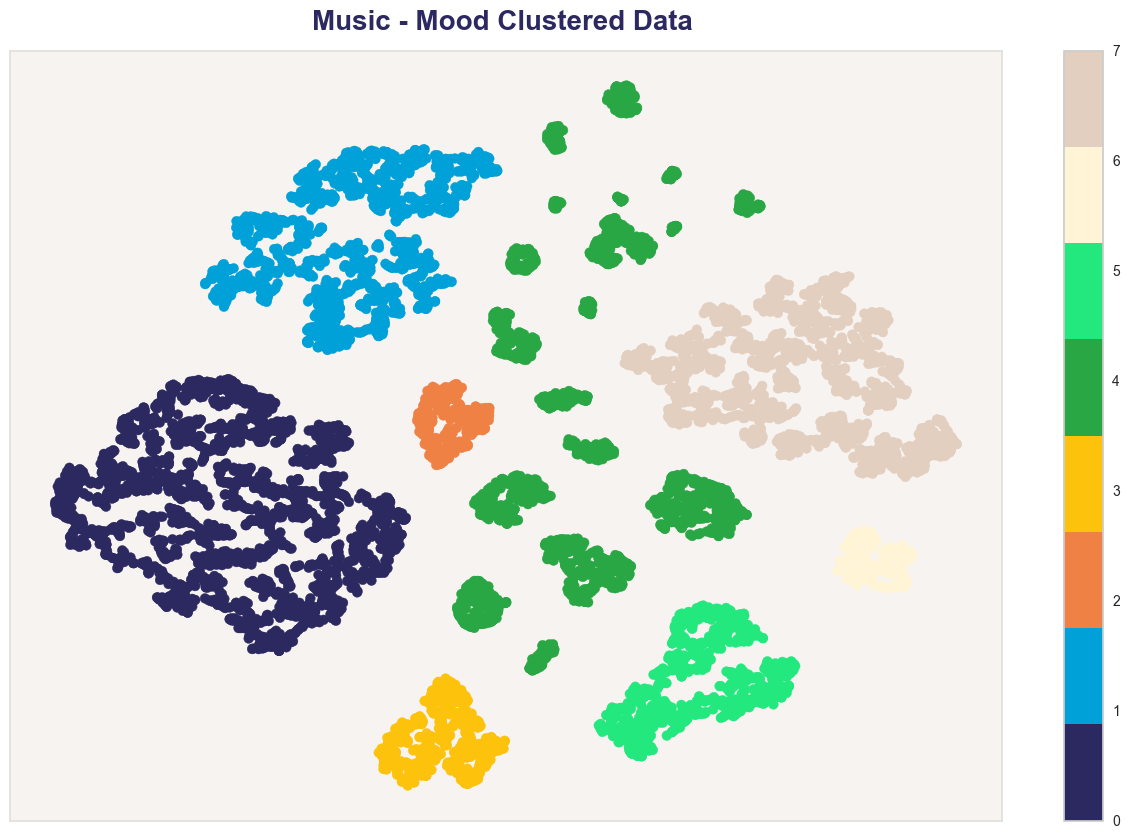

,track_id,track_name,artist_name
272,5nNmWmbrT4FfNpJ0TdYgul,ヤキモチ,Yu Takahashi
203,4oynwVo19JHca1wkkllpfA,Dörrslusk,Magnus Uggla
337,4mTPviBGRgjPxeaQFnBDW3,Дорадура,дора
81,7r8lCmQ4AxLAFEN1N60QdU,Мама-анархия - Квартирник Виктора Цоя у Суровц...,Viktor Tsoi
178,2V10TkPwc9cZbLcNL3zQpl,Es lebe der Sport,Rainhard Fendrich


<Figure size 800x550 with 0 Axes>

In [69]:
user_preferences = {'mood goal': 'relaxed', 'preferred_genre': 'pop'}


recommended_moosic_playlist, scored_track_data = moosic_recommender(user_preferences['mood goal'], user_preferences['preferred_genre'], modelling_data = modelling_data, playlist_length= 5, cluster_params = main_cluster_params, 
                            pca=False, tsne=True, sample_size = 10000)



recommended_moosic_playlist


In [ ]:
scored_track_data

In [65]:
scored_track_data

,track_id,track_name,artist_name,mood_goal,core_genres,mood_label,cluster_labels,mood_genre,Miss Larceny Blues,Just as I Am,...,Stara Lou,One Light Burning,Liquorice,Window Shopper,Määrli,El Pescador,Metamorfózy,Gutless,שרהלה היתה אוהבת את זה,John Jenin
0,5B6OuR9hkz99N3LVrhkyRy,Miss Larceny Blues,Hot Lips Page,calm,jazz,1,5,calm jazz,1.000000,0.228228,...,0.000000,0.000000,0.0,0.000000,0.00000,0.165389,0.000000,0.000000,0.000000,0.000000
1,1PORoQb3Fdo4i4ooz4CpYq,Just as I Am,Willie Nelson,calm,rock,1,4,calm rock,0.228228,1.000000,...,0.000000,0.144079,0.0,0.000000,0.00000,0.172326,0.150499,0.154581,0.000000,0.000000
2,5k0EzIxv7HQXSrhDAOnrTq,"Cant Get Out of This Mood - From the Film ""Sev...",Sarah Vaughan,calm,soul,1,1,calm soul,0.175902,0.183280,...,0.000000,0.000000,0.0,0.000000,0.00000,0.132817,0.000000,0.000000,0.000000,0.000000
3,3Hg1VGBzitRc2HXwHHac2v,Benta Bounce,Bugoy Na Koykoy,depressed,hip hop,2,0,depressed hip hop,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.53221,0.000000,0.000000,0.000000,0.000000,0.000000
4,61WTmuZHIC5MrndlTzb1GT,Ultimatum,Quartier Latin,euphoric,gospel,3,3,euphoric gospel,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.146006,0.000000,0.153271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4ujG44BiviDkeNRTZabs3Q,El Pescador,Tabaré Etcheverry,calm,other,1,0,calm other,0.165389,0.172326,...,0.000000,0.000000,0.0,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
9996,6BEJFMYFZnYFhoo7P8EWKM,Metamorfózy,Prazsky Vyber,angry,rock,0,5,angry rock,0.000000,0.150499,...,0.000000,0.154743,0.0,0.299347,0.00000,0.000000,1.000000,0.166023,0.000000,0.000000
9997,1sxOACEZ2xAMRB0TLaCwIl,Gutless,Hole,euphoric,rock,3,7,euphoric rock,0.000000,0.154581,...,0.000000,0.158940,0.0,0.000000,0.00000,0.000000,0.166023,1.000000,0.000000,0.299425
9998,26adGTfzIfW6GsEODYjT9h,שרהלה היתה אוהבת את זה,Meir Ariel,sad,pop,6,0,sad pop,0.000000,0.000000,...,0.129687,0.000000,0.0,0.139170,0.00000,0.000000,0.000000,0.000000,1.000000,0.138152


In [66]:

#from sklearn.metrics import rand_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score


print(rand_score(scored_track_data['mood_label'], scored_track_data['cluster_labels']))

print(homogeneity_score(scored_track_data['mood_label'], scored_track_data['cluster_labels']))


print(completeness_score(scored_track_data['mood_label'], scored_track_data['cluster_labels']))


print(v_measure_score(scored_track_data['mood_label'], scored_track_data['cluster_labels']))

print(silhouette_score(scored_track_data['mood_label'].to_numpy().reshape(-1,1), scored_track_data['cluster_labels'].to_numpy().reshape(-1,1)))


0.7372871287128713
0.0010076440878890069
0.0011185938331648535
0.0010602242125180446
-0.03234685995853716


In [61]:

def web_app_query(mood, genre, playlist_length = 5):
    
    playlist = moosic_recommender(mood, genre, modelling_data = modelling_data, playlist_length= playlist_length, cluster_params = main_cluster_params, 
                            pca=False, tsne=True, sample_size = 10000)

    #return model
    return playlist.to_dict('records')


# model = web_app_query('calm', 'pop', playlist_length = 5)



In [ ]:
web_app_query('happy', 'pop')

In [ ]:
import pickle 

with open('model.bin', 'wb') as f:
    pickle.dump(web_app_query, f, pickle.HIGHEST_PROTOCOL)

* Delete prints
* change dataframe into list of dicts


In [ ]:
model.to_dict('records')

In [ ]:
main_clustered_data, main_clustered_embeddings, main_scaled_embeddings = moosic_clustering(Xm_train, playlist_length= 5, cluster_params = main_cluster_params, 
                                                                            mood_clusters = mood_clusters, pca=False, tsne=True, sample_size = 20000)



## Evaluation and error analysis

* baseline vs main model
    - comparison and evaluation of baseline model (mini batch kmeans then filtered based on the clusters ) and main model (used minibatch-kmeans and filtered based on the similarty scores of the items in each clusters)




In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load your music dataset (replace 'your_dataset.csv' with your data)
data = pd.read_csv('your_dataset.csv')

# Extract features (assuming you have feature columns)
features = data[['feature1', 'feature2', ...]]

# Preprocess the features (e.g., standardize them)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 1: DBSCAN Clustering
# Set DBSCAN hyperparameters (you may need to adjust these)
epsilon = 0.5  # Maximum distance between samples to be in the same cluster
min_samples = 5  # Minimum number of samples in a neighborhood to form a core point

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean')
cluster_labels = dbscan.fit_predict(scaled_features)

# Step 2: Compute Similarity Scores (You might have this from a precomputed source)
similarity_matrix = pairwise_distances(scaled_features, metric='cosine')

# Step 3: Recommendation
# Create a function to recommend tracks based on similarity
def recommend_tracks(track_id, num_recommendations=5):
    if cluster_labels[track_id] == -1:
        return "This track is an outlier and not in any cluster."

    # Find the nearest neighbors within the same cluster
    cluster_mask = cluster_labels == cluster_labels[track_id]
    neighbor_indices = [i for i in range(len(cluster_labels)) if cluster_mask[i]]

    # Compute track similarities for the cluster
    track_similarities = similarity_matrix[track_id, neighbor_indices]

    # Sort tracks by similarity and get top recommendations
    sorted_indices = sorted(range(len(track_similarities)), key=lambda i: track_similarities[i])
    top_recommendations = [neighbor_indices[i] for i in sorted_indices[:num_recommendations]]

    # Return recommended track IDs or names
    recommendations = data.iloc[top_recommendations]['track_name']
    return recommendations

# Example usage: Recommend tracks similar to track_id=0
track_id_to_recommend = 0


In [205]:
final_data

,track_id,track_name,artist_name,mood_goal,core_genres,mood_label,cluster_labels
0,3IQ5Q7QVh8slmnH8QKL0W5,Tomame o Dejame,Maria Conchita Alonso,depressed,pop,2,3.0
1,1jpAWi5bencl8ALdWFHC8X,Волки,Bi-2,angry,rock,0,2.0
2,4rcKkyrC9ODuAPwdB468Uj,Switchstance,Quarashi,tense,rock,7,2.0
3,6WZZe90axkD87qnEVcBSgY,God Save The Queen,Tat Ming Pair,sad,rock,6,2.0
4,5VU6nvX3BqkqBmOJ2d9vhW,I Write The Songs,Barry Manilow,depressed,rock,2,2.0
...,...,...,...,...,...,...,...
4995,6o4WeGOxtpzJ5dJsTQ9n1T,Sexo,Spinetta Jade,depressed,rock,2,2.0
4996,48ZsVw8xEysY2yx4IYrDSV,kan sahibi,Contra,angry,hip hop,0,1.0
4997,7uLKyipL5WfndsHMRSGEUS,Lonely Days,Bee Gees,sad,rock,6,2.0
4998,6Qd4bZlKaxApDHEuoOuAQ6,Volunteers - Live at The Woodstock Music & Art...,Jefferson Airplane,tense,rock,7,2.0


In [ ]:
# Sort tracks by similarity and get top recommendations

user_preference = " ".join(user_preferences.values())

clusters =  user_preference 




In [ ]:

neighbor_indices = [i for i in range(len(cluster_labels)) if cluster_mask[i]]
sorted_indices = sorted(range(len(final_data)), key=lambda i: final_data[i])
top_recommendations = [neighbor_indices[i] for i in sorted_indices[:5]]

# Return recommended track IDs or names
recommendations = data.iloc[top_recommendations]['track_name']

# Might contain errors from here on

In [ ]:
plt.subplot(1, 2, 2)
sns.heatmap(track_similarity_matrix, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Similarity Matrix")

In [ ]:

# main model : classifier predictions?
# - modelling : clustering + classifying (ML classification modelling?)

clf_params = {
        'n_estimators': 50,
        'learning_rate': 0.01,
        'max_depth': 8
    }


def moosic_recommender2(modelling_data = modelling_data, playlist_length= 5, cluster_params = baseline_cluster_params, clf_params = clf_params,
                        pca=False, tsne=True, sample_size = 5000, user_preferences = user_preferences, *args, **kwargs):



    # data : train, test features and targets

    X_train, X_test = modelling_data['X_train'], modelling_data['X_test']
    Y_train, Y_test = modelling_data['Y_train'], modelling_data['Y_test']
    y_train, y_test = modelling_data['y_train'], modelling_data['y_test']
    
    # get dummies
    #encoded_y_train, encoded_y_test = modelling_data['encoded_y_train'], modelling_data['encoded_y_test']

    # Label encoder
    encoded_y_train, encoded_y_test = LabelEncoder().fit_transform(y_train), LabelEncoder().fit_transform(y_test)

    recommender_start_time = time.time()

    # model : clustering with mini-batch kmeans 
    clustered_data, clustered_embeddings, cluster_labels, cluster_centers = clustering_model(X_train,  pca = pca, tsne = tsne, 
                                                                        params = cluster_params, sample_size = sample_size)

    print("________"*20)
    print("________"*20)


    # model : to visualize the clustered data with t-sne
    plt.figure(figsize = (16, 10))

    scaled_embed = MinMaxScaler().fit_transform(clustered_embeddings)
    plt.scatter(scaled_embed[:, 0], scaled_embed[:, 1], c=cluster_labels, cmap=custom_cmap_hex1)

    plt.legend()
    plt.title('Music - Mood Clustered Data ', pad=15, fontsize = 20, weight = 'bold', color='#2B2960')
    plt.colorbar()

    get_axes = plt.gca()
    xax = get_axes.axes.get_xaxis()
    xax = xax.set_visible(False)

    yax = get_axes.axes.get_yaxis()
    yax = yax.set_visible(False)

    plt.show()


    # model recommender (classification/similarity and prediction/filter) part: 

    moosic_cluster_data = pd.concat([ Y_train, clustered_data['cluster_labels']], axis=1)
    moosic_cluster_data['mood_genre'] = moosic_cluster_data['mood_goal'] + ' ' + moosic_cluster_data['core_genres']


    ## track vectorization and track - to - track similarity computation

    tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))
    track_mood_genre_vector = tfidf_vectorizer.fit_transform(moosic_cluster_data['mood_genre'])

    track_similarity_matrix = linear_kernel(track_mood_genre_vector, track_mood_genre_vector)
    track_similarity_data = pd.DataFrame(track_similarity_matrix, index=moosic_cluster_data['track_name'], columns=moosic_cluster_data['track_name'])
    track_similarity_data = track_similarity_data.reset_index(drop=True)
    track_similarity_data = track_similarity_data.rename_axis(None, axis=1)

    # features track_similarity_data
    tsd_features = track_similarity_data.columns.tolist()
    scored_track_data = pd.concat([moosic_cluster_data, track_similarity_data], axis=1)


    ## split moosic_cluster_data + similarity scores data into train and test

    X_clf = scored_track_data[tsd_features] 
    Y_clf = scored_track_data[['artist_name', 'track_id',  'track_name', 'mood_goal', 'core_genres']]
    y_clf = Y_clf[['mood_goal']]

    #y_clf_classes = np.unique(y_clf)
    encoded_y_clf = LabelEncoder().fit_transform(y_clf)
    y_clf['mood_label'] = encoded_y_clf


    # drop duplicate column names
    #df.rename(columns={'duplicate_column_name': 'new_column_name'}, inplace=True)
    X_clf = X_clf.loc[:,~X_clf.columns.duplicated()].copy()


    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf['mood_label'], test_size=0.25, random_state=42, shuffle=True)


    ## model : classifier
    ## - fit on X_train_clf, y_train_clf
    clf_model = XGBClassifier(**clf_params)
    clf_fitted_model = clf_model.fit(X_train_clf, y_train_clf)   
    y_predict_probs = clf_model.predict_proba(X_test_clf)
    predictions = clf_model.predict(X_test_clf)


    ## personalized computation : 
    ## - combine input text preferences on mood + genre for user - (tfidf) vectorization 
    ## - user choices to track similarty prediction and similarity score

    user_preference = " ".join(user_preferences.values())


    ## personalized computation : 
    ## - combine input text preferences on mood + genre for user - (tfidf) vectorization 
    ## - user choices to track similarty prediction and similarity score

    user_preference = " ".join(user_preferences.values())

    user_vector = tfidf_vectorizer.transform(user_preference.to_list()) # error, correct and reshape
    user_vector = user_vector.reshape(1, -1) #.reshape(-1, 1)
    print(f'test {user_vector.shape}')

    personalized_prediction = clf_model.predict(user_preference.to_list())[0] 
    user_scores = clf_model.predict_proba(user_vector) #y_user_preds # shape mismatch?
    moosic_tracks_scores = np.dot(user_scores, track_similarity_matrix)


    # query track to track similarity moosic data based on user input
    queried_user_data = scored_track_data.copy(deep = True)
    queried_user_data = (queried_user_data.query(" mood_genre == @user_preference ")).reset_index(drop=True)

    ## - sort random N mood-music tracks by predicted probability for the category entered

    moosic_randomN_idx = np.random.choice(
                            queried_user_data.index,
                            size = 5, #playlist_length,
                            replace= False #random n = 5
                            )

    recommended_moosic_playlist = queried_user_data[['track_id', 'track_name', 'artist_name']].iloc[moosic_randomN_idx]

    print(f"Here are your mood based recommended music tracks, enjoy! \n : {recommended_moosic_playlist.values}")


    recommender_end_time = time.time()
    recommender_train_time = recommender_end_time - recommender_start_time
    print(f"Time taken for the recommender model : {recommender_train_time:.2f} seconds")

    print("________"*20)
    print("________"*20)


    composed_variables = {
        
        # fitted cluster model
        'embedded_clustered_model' : scaled_embed,

        # vectors, similarity matrices and scores data
        'track_mood_genre_vector' : track_mood_genre_vector,
        'track_similarity_matrix' : track_similarity_matrix,
        'track_similarity_data' : track_similarity_data,

        'scored_track_data' : scored_track_data,

        'clf_fitted_model' : clf_fitted_model,
        'predicted_probabilities' : y_predict_probs,
        'predictions' : predictions,

        'user_vector' : user_vector,
        'personalized_prediction' : personalized_prediction,
        'user_scores' : user_scores,
        'moosic_tracks_scores' : moosic_tracks_scores,

        'user_to_track_similarity' : user_to_track_similarity,

        # recommended playlist random
        'moosic_randomn_idx' : moosic_randomn_idx,
        'recommended_moosic_playlist' : recommended_moosic_playlist,

        # data for classifier part
        'X_train_clf' : X_train_clf,
        'X_test_clf' : X_test_clf,
        'y_train_clf' : y_train_clf,
        'y_test_clf' : y_test_clf,
        }

    return composed_variables









In [ ]:


composed_variables =  moosic_recommender(modelling_data = modelling_data, playlist_length= 5, cluster_params = baseline_cluster_params, clf_params = clf_params,
                        pca=False, tsne=True, sample_size = 5000, user_preferences = {'mood goal': 'relaxed', 'preferred_genre': 'pop'})




In [ ]:
# evaluate

#encoded_y_train, encoded_y_test = modelling_data['encoded_y_train'], modelling_data['encoded_y_test']




# Hyperparameter tuning

In [ ]:

# classifier/prediction model
# hyperparameter optimization



def classifier_tuning(x_data, y_data, model_params, random_state=42, *args, **kwargs): # model_name = 'random forest',  *args, **kwargs):

    classifiers = [
        ('RandomForestClassifier', RandomForestClassifier()),
        ('XGBClassifier', XGBClassifier()),
        ('LinearSVC', LinearSVC()),
        ('MultinomialNB', MultinomialNB()),
        ('AdaBoostClassifier', AdaBoostClassifier()),
        ('GradientBoostingClassifier', GradientBoostingClassifier())
    ]

    
    cv = KFold(n_splits=3, shuffle=True, random_state=42)

    best_classifiers = {}

    for model_name, clf_model in classifiers: 

        cv_space = model_params[model_name]
        #grid_search = GridSearchCV(classifiers, param_grid, cv=cv)
        random_search = RandomizedSearchCV(clf_model, param_distributions=cv_space, n_iter=10,
                                scoring='accuracy', n_jobs=-1, cv=cv, random_state=random_state)

        random_search.fit(x_data, y_data)
        best_classifiers[model_name] = random_search.best_estimator_

        print(f"The best hyperparameters for {model_name} are: \n {random_search.best_params_}")
        print(f"The best score for {model_name} is: {random_search.best_score_}")

        scores = cross_val_score(random_search, x_data, y_data, scoring='accuracy', cv=3, n_jobs=-1)

        print( f" The {model_name} accuracy is : mean - {np.mean(scores):.3f} &  std - {np.std(scores):.3f} " )

    return best_classifiers



# tune


model_params = {
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 3, 8, 11, 20],
        'min_samples_split': [2, 5, 10]
    },
    'XGBClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [None, 3, 8, 11, 20]
    },
    'LinearSVC': {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l1', 'l2']
    },
    'MultinomialNB': {
        'alpha': [0.01, 0.1, 1.0],
        'fit_prior': [True, False]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [None, 3, 8, 11, 20]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    },
}

#x_data = 

#y_data 

classifier_tuning(X_train, y_train['cluster_labels'], model_params, random_state=42)



# Error analysis : clustering and classification metrics


In [ ]:
# error analysis : clustering and classification metrics


def classification_metrics(ground_truth, predictions):

    score_rocauc = roc_auc_score(ground_truth.to_numpy().reshape(-1,1), predictions.to_numpy().reshape(-1,1))
    print(f"ROC of: {score_rocauc:.2f} ")

    score_acc = accuracy_score(ground_truth.to_numpy().reshape(-1,1), predictions.to_numpy().reshape(-1,1))
    print(f"ROC of: {score_acc:.2f} ")

    score_report = classification_report(ground_truth.to_numpy().reshape(-1,1), predictions.to_numpy().reshape(-1,1))
    print(f"ROC of: {score_report:.2f} ")

    score_matrix = confusion_matrix(ground_truth.to_numpy().reshape(-1,1), predictions.to_numpy().reshape(-1,1))
    print(f"ROC of: {score_matrix:.2f} ")

    score_roc = roc_curve(ground_truth.to_numpy().reshape(-1,1), predictions.to_numpy().reshape(-1,1))
    print(f"ROC of: {score_roc:.2f} ")


    scores = {
        'roc_auc_score' : score_rocauc,
        'accuracy_score' : score_acc,
        'classification_report' : score_report,
        'confusion_matrix' : score_matrix,
        'roc_curve' : score_roc,
        }
    

    return scores






In [ ]:

# evaluation of models
# - recommended music tracks based on mood and genre
# - actual music track groupings based on mood and genre

def clf_evaluation_metrics(predictions, ground_truth, playlist_length= 5, user_preferences = {'mood goal': 'relaxed', 'preferred_genre': 'hip hop'}):
    
    moosic_groups = set(ground_truth)
    n_recommended = set(predictions[:playlist_length])
    intersection = moosic_groups.intersection(n_recommended)

    # precision at recommended playlist lenght, N = 5 (top n? random?)
    precision_n = len(intersection) / playlist_length

    # recall at recommended playlist lenght, N = 5 (top n? random?)
    recall_n = len(intersection) / len(playlist_length)

    # f1_score at recommended playlist lenght, N = 5 (top n? random?)
    f1_form = 2 * (precision_n * recall_n) / (precision_n + recall_n)
    f1_score_n = [0 if (p_n + r_n)==0 else f1_form for p_n, r_n in zip(precision_n, recall_n)]

    # mean average precision (MAP) at recommended playlist lenght, N = 5 (top n? random?)
    # map_n = lambda true_items, recommended_items, n: np.mean([precision_at_n(true_items, recommended_items, i + 1) 
    #                   for i, item in enumerate(recommended_items[:n]) if item in set(true_items)]) if any(item in set(true_items) for item in recommended_items[:n]) else 0
    for i in range(playlist_length):
        if any(predictions[i]) in moosic_groups:
            map_n = np.mean([ len(intersection) for i in range(playlist_length)]) #if predictions[i] in moosic_groups ]) 
        else:
            map_n = 0


    # discounted cumulative gain (DCG) at recommended playlist lenght, N = 5 (top n? random?)
    dcg_n = sum((2 ** 1 - 1) / np.log2(i + 2) for i, track in enumerate(predictions[:playlist_length]) if track in ground_truth)

    # normalized discounted cumulative gain (NDCG) at recommended playlist lenght, N = 5 (top n? random?)
    optimal_dcg_n = sum((2 ** 1 - 1) / np.log2(i + 2) for i, track in enumerate(predictions[:playlist_length]) if track in sorted(ground_truth, reverse=True))
    ndcg_n  = [0 if optimal_dcg_n==0 else dcg_n / optimal_dcg_n]


    eval_data = {
        'user_preferences' : user_preferences,
        'playlist_length' : playlist_length,
        'predictions' : predictions,
        'ground_truth' : ground_truth,
        'moosic_groups' : moosic_groups,
        'n_recommended' : n_recommended,
        'intersection' : intersection,
        'precision_n' : precision_n,
        'recall_n' : recall_n,
        'f1_score_n' : f1_score_n,
        'map_n' : map_n,
        'dcg_n' : dcg_n,
        'optimal_dcg_n' : optimal_dcg_n,
        'ndcg_n' : ndcg_n
        }


    return eval_data







# User data - test

|  user_id  |  user_name  | preferred_genre | mood_goal | previous_choices |
|:---------:|:-----------:|:---------------:|:---------:|:----------------:|
|  m1m0h0  |  apollo  | hip hop | happy | ['new age', 'any'] |
|  m1m0h1  |  egwu | any | euphoric | ['electronic', 'tense'] |
|  m1m0h2  |  aurras   | folk | sad | ['world/traditional', 'euphoric'] |
|  m1m0h3  |  pelios  | jazz | tense | ['country', 'relaxed'] |
|  m1m0h4  |  inuaria  | metal | calm | ['blues', 'angry'] |
|  m1m0h5  |  psyche  | blues | depressed | ['any', 'happy'] |
|  m1m0h6  |  ihy  | pop | any | ['folk', 'sad'] |
|  m1m0h7  |  ova  | rock | angry | ['jazz, 'relaxed'] |
|  m1m0h8  |  thalia  | any | relaxed | ['hip hop', 'calm'] |




In [ ]:
# test

user_preferences = {'mood goal': ['relaxed', 'tense'], 'preferred_genre': ['hip hop', 'folk']}
user_test_data = pd.DataFrame([user_preferences])

user_test_data



---

#### Initial analysis of the metrics

For the mini-batch kmeans clustering with:  
* rand_score of: 0.78  means the model is good (okay) with respect to the true mood_class
* fowlkes_mallows_score of: 0.17 , bad or moderate cluster prediction by the model?
* homogeneity_score of: 0.09, low score indicates the clusters are not highly homogeneous with respect to the predicted mood_class labels 
* completeness_score of: 0.09, low score indicates that some data points of the same class are split across predicted by the model clusters 
* v_measure_score of: 0.09 , okay/bad? quality of clustering
* mutual_info_score of: 0.18, an okay level of shared information 
* adjusted_rand_score of: 0.04 , low level beyond what is expected by chance
* adjusted_mutual_info_score of: 0.09 , low/okay level of agreement beyond what is expected by chance

<br>

For the mini-batch kmeans clustering with:  
* silhouette_score of: -0.22 , negative, the clusters overlap and are not well separated
* calinski_harabasz_score of: 2729.40 , better separation between clusters? , low within-cluster variance due to high value

<br>

* rand_score measures: the similarity of the predicted clusters and the true clusters for the mood music data, 0 (not a good match/clustering) to 1 (perfect identical to true clusters) 
* fowlkes_mallows_score: the similarity of the predicted clusters and the true clusters for the mood music data, 0 (not a good match/clustering) to 1 (perfect) 
* homogeneity_score: a measure of how much each cluster contains only data points that belong to a single class
* completeness_score: a measure of how well all cluster data points that belong to the same class are assigned to the same cluster
* v_measure_score: the harmonic mean of homogeneity and completeness, a balanced measure of the quality of clusters 
* mutual_info_score: the measure of the amount of information shared between true and predicted clusters
* adjusted_rand_score: a variation of the rand index score that accounts for chance
* adjusted_mutual_info_score: a variation of the mutual info score that accounts for chance
* silhouette_score : it measures the quality of clusters by evaluating how similar each data point is to its own cluster compared to other clusters
* calinski_harabasz_score: the variance ratio criterion, it measures the cluster quality based on between-cluster and within-cluster variance



<br>

In summary, the model 

* was able to cluster 78% of the data to the right mood clusters for the music tracks based on valence and other audio features
* thus the baseline model predicted clusters is approximately 78 % similar to the actual music-mood (1-D) clusters
* also show that clusters are not well separated and a lot of music data belonging to similar clusters were not sisigned to the same ones
* the music tracks smaples seem to belong to multiple mood classes



---


In [ ]:
# similarity between the predicted and actual mood clusters
# by what percentage are they similar?
# rand index score of 0.78
# in terms of % 

RI = 0.82
RI_rate = RI * 100
print(f"The similarity rate between predicted and true clusters is {RI_rate:.2f} %")
print(f"The baseline model predicted clusters is approximately {RI_rate:.2f} % similar to the actual music-mood (1-D) clusters")

